In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import sys
from tqdm import tqdm

from barebones_ai.supervised.nn import SGD
from barebones_ai.supervised.nn import Dense
from barebones_ai.supervised.nn import Input
from barebones_ai.supervised.nn import Softmax
from barebones_ai.supervised.nn import DNN
from barebones_ai import utils


%matplotlib inline

# DeepNeuralNetwork 

## Regression

### approximate sin function from random values.

In [6]:
x = np.linspace(-1, 1, 1000)

In [7]:
y = np.sin(x)**2

In [8]:
df = pd.DataFrame({'x':x,'y':y})

In [9]:
x = x.reshape(x.shape[0],1)
dnn = DNN()
dnn.add(Input(x))
dnn.add(Dense(24,activation="sigmoid"))
dnn.add(Dense(48,activation="relu"))
dnn.add(Dense(24,activation="sigmoid"))
dnn.add(Dense(12,activation="relu"))
dnn.add(Dense(1,activation="linear"))
print(dnn)

----------------------------- Model -----------------------------
Input: shape: (None, 1)
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (1, 24), output shape: (None, 24), parameters: 24
-----------------------------------------------------------------
Dense: activation: relu, weight shape: (24, 48), output shape: (None, 48), parameters: 1152
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (48, 24), output shape: (None, 24), parameters: 1152
-----------------------------------------------------------------
Dense: activation: relu, weight shape: (24, 12), output shape: (None, 12), parameters: 288
-----------------------------------------------------------------
Dense: activation: linear, weight shape: (12, 1), output shape: (None, 1), parameters: 12
-----------------------------------------------------------------



In [12]:
dnn.fit(x,y,lr=0.001,epochs=250)

MSE 0.09951565869810051: 100%|█████████████████████████████████████████| 250/250 [01:04<00:00,  3.86it/s]


In [13]:
predictions = dnn.predict(x)

In [14]:
predictions = predictions.reshape(predictions.shape[0],)

In [15]:
newd = pd.DataFrame({'x':df["x"],'y':predictions})

In [16]:
df["y"][:20]

0     0.708073
1     0.706251
2     0.704426
3     0.702597
4     0.700765
5     0.698930
6     0.697092
7     0.695250
8     0.693406
9     0.691558
10    0.689707
11    0.687854
12    0.685997
13    0.684137
14    0.682274
15    0.680408
16    0.678540
17    0.676668
18    0.674794
19    0.672917
Name: y, dtype: float64

In [17]:
newd["y"][:20]

0     0.694623
1     0.692909
2     0.691193
3     0.689476
4     0.687757
5     0.686037
6     0.684316
7     0.682593
8     0.680868
9     0.679142
10    0.677415
11    0.675686
12    0.673956
13    0.672224
14    0.670491
15    0.668756
16    0.667020
17    0.665283
18    0.663544
19    0.661804
Name: y, dtype: float64

Predicted after 1000 epochs

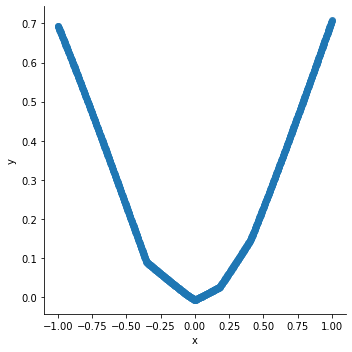

In [18]:
sns.lmplot(x='x', y='y',data=newd,
           fit_reg=False, # No regression line
          )  

Original sin wave

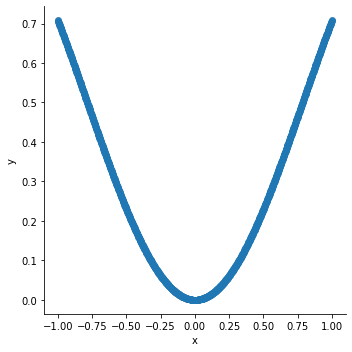

In [19]:
sns.lmplot(x='x', y='y',data=df,
           fit_reg=False, # No regression line
          )   

## Classification

## Iris

In [20]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)

In [23]:
X = X[indices]
y = y[indices]
X_train, X_test, y_train, y_test = utils.cross_val_split_set(X,0.1,y)
y_train = np.array(pd.get_dummies(y_train))

In [25]:
dnn = DNN()
dnn.add(Input(X_train))
dnn.add(Dense(24,activation="relu"))
dnn.add(Dense(48,activation="relu"))
dnn.add(Dense(16,activation="sigmoid"))
dnn.add(Dense(3,activation="softmax"))
print(dnn)

----------------------------- Model -----------------------------
Input: shape: (None, 4)
-----------------------------------------------------------------
Dense: activation: relu, weight shape: (4, 24), output shape: (None, 24), parameters: 96
-----------------------------------------------------------------
Dense: activation: relu, weight shape: (24, 48), output shape: (None, 48), parameters: 1152
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (48, 16), output shape: (None, 16), parameters: 768
-----------------------------------------------------------------
Dense: activation: softmax, weight shape: (16, 3), output shape: (None, 3), parameters: 48
-----------------------------------------------------------------



In [27]:
dnn.fit(X_train,y_train,lr=0.001,epochs=250,loss="cross_entropy")

Cross Entropy 0.19095771952700238: 100%|███████████████████████████████| 250/250 [00:07<00:00, 35.61it/s]


### Train Acc

In [29]:
utils.calc_accuracy(dnn.predict(X_train),y_train)

0.9777777777777777

### Test Acc

In [30]:
utils.calc_accuracy(dnn.predict(X_test),y_test)

1.0

## MNIST

In [31]:
mnist = datasets.load_digits()

In [33]:
X = mnist.data
y = mnist.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]
X_train, X_test, y_train, y_test = utils.cross_val_split_set(X,0.1,y)
y_train = np.array(pd.get_dummies(y_train))

In [34]:
dnn = DNN()
dnn.add(Input(X_train))
dnn.add(Dense(24,activation="relu"))
dnn.add(Dense(48,activation="relu"))
dnn.add(Dense(16,activation="sigmoid"))
dnn.add(Softmax(10))
print(dnn)

----------------------------- Model -----------------------------
Input: shape: (None, 64)
-----------------------------------------------------------------
Dense: activation: relu, weight shape: (64, 24), output shape: (None, 24), parameters: 1536
-----------------------------------------------------------------
Dense: activation: relu, weight shape: (24, 48), output shape: (None, 48), parameters: 1152
-----------------------------------------------------------------
Dense: activation: sigmoid, weight shape: (48, 16), output shape: (None, 16), parameters: 768
-----------------------------------------------------------------
Softmax: activation: softmax, weight shape: (16, 10), output shape: (None, 10), parameters: 160
-----------------------------------------------------------------



In [36]:
dnn.fit(X_train,y_train,lr=0.001,epochs=250,loss="cross_entropy")

  0%|                                                                            | 0/250 [00:00<?, ?it/s]/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/barebones_ai-0.1.2-py3.9.egg/barebones_ai/activations.py:12: RuntimeWarning: overflow encountered in power
/home/shyam/anaconda3/envs/py39/lib/python3.9/site-packages/barebones_ai-0.1.2-py3.9.egg/barebones_ai/activations.py:10: RuntimeWarning: overflow encountered in power
Cross Entropy 0.13068474037466743: 100%|███████████████████████████████| 250/250 [01:29<00:00,  2.81it/s]


### Train Acc

In [38]:
utils.calc_accuracy(dnn.predict(X_train),y_train)

0.9857849196538937

### Test Acc

In [39]:
utils.calc_accuracy(dnn.predict(X_test),y_test)

0.9162011173184358